# Multiple Linear Regression

### Analyze mpg dataset
- Numerical independent variables: `displacement`, `horsepower`, `weight`, `acceleration`, `model_year`
- Categorical independent variables: `cylinders`, `origin`
- Dependent variable: `mpg`

### - Analyze the relationship
### - Apply Multiple Linear Regression with dummy variables
### - Perform Simultaneous Test (F-test) and Partial Test (t-test)
### - Check the assumptions (linearity, normality, homoscedasticity, independence)
### - Interpret the results
### - Use α = 5% (α = 0.05)

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

## **Dataset info**
Seaborn `mpg` dataset: 398 rows and 9 variables

1. **mpg**  
Miles per gallon (fuel efficiency)

2. **cylinders**  
Number of cylinders in the engine (3, 4, 5, 6, 8)

3. **displacement**  
Engine displacement in cubic inches

4. **horsepower**  
Engine horsepower

5. **weight**  
Vehicle weight in pounds

6. **acceleration**  
Time to accelerate from 0 to 60 mph (seconds)

7. **model_year**  
Year of the model (mod 1900, e.g., 70 = 1970)

8. **origin**  
Origin of the car (1: USA, 2: Europe, 3: Japan)

9. **name**  
Name of the car


In [115]:
# import dataset mpg dari seaborn
df = sns.load_dataset('mpg')

# menampilkan 5 baris teratas
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [116]:
# mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [117]:
# mengecek statistik deskriptif dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [118]:
# drop baris dengan nilai null
df = df.dropna()

## **Create dummy variables**

### **Fungsi**
Dummy variables digunakan untuk **mengubah variabel kategorikal menjadi numerik** agar dapat digunakan dalam model regresi linear.  

- Regresi linear hanya menerima **variabel numerik** sebagai input.
- Variabel kategorikal (misalnya `origin` atau `cylinders`) perlu diubah menjadi format **0 dan 1** untuk setiap kategori.
- Ini memungkinkan model mengestimasi pengaruh masing-masing kategori terhadap variabel dependen.

### **Contoh**
Jika variabel `origin` memiliki 3 kategori:  
- USA → 1, 0, 0  
- Europe → 0, 1, 0  
- Japan → 0, 0, 1  

Masing-masing kolom baru disebut **dummy variable**, dan biasanya satu kategori dijadikan referensi (tidak dimasukkan ke model) untuk **menghindari multicollinearity** (dummy variable trap).

### **Kegunaan**
1. Memasukkan variabel kategorikal ke dalam regresi linear.
2. Mengestimasi pengaruh spesifik tiap kategori terhadap variabel dependen.
3. Membantu interpretasi koefisien regresi per kategori.

In [119]:
# mengubah fitur kategorikal origin menjadi dummy variabel
df_dummy = pd.get_dummies(df, drop_first=True)

# menampilkan 5 baris teratas dataset dummy
df_dummy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,name_amc ambassador dpl,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## **Check Correlation**

### **Fungsi**
Pemeriksaan korelasi dilakukan untuk **mengetahui hubungan antar variabel numerik** sebelum memasukkannya ke dalam model regresi.  

- Korelasi menunjukkan **seberapa kuat dan arah hubungan** antara dua variabel.  
  - Nilai berkisar dari -1 sampai 1:  
    - +1 → hubungan positif sempurna  
    - -1 → hubungan negatif sempurna  
    - 0 → tidak ada hubungan linear  
- Penting untuk **menghindari multicollinearity**, yaitu ketika dua atau lebih variabel independen sangat berkorelasi.

### **Langkah**
1. Hitung **correlation matrix** untuk semua variabel numerik.  
2. Periksa **nilai korelasi tinggi** (biasanya > 0.8 atau < -0.8).  
3. Jika ditemukan korelasi tinggi antar variabel independen, pertimbangkan untuk:  
   - Menghapus salah satu variabel, atau  
   - Menggabungkan variabel, atau  
   - Menggunakan teknik regularisasi (misal Ridge atau Lasso).

### **Kegunaan**
1. Mencegah **multicollinearity** yang bisa merusak estimasi koefisien regresi.  
2. Memilih **variabel terbaik** untuk model regresi.  
3. Memberikan gambaran awal hubungan antar variabel.

In [122]:
# melihat korelasi antar fitur
df_dummy.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,name_amc ambassador dpl,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.451454,-0.565161,-0.054795,...,-0.035332,-0.009381,-0.022356,-0.041819,0.047063,0.129457,0.133349,0.108442,0.135296,0.054848
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.404209,0.610494,0.075046,...,-0.043695,-0.043695,-0.043695,0.015676,0.015676,-0.043695,-0.043695,-0.061873,-0.043695,-0.043695
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.440825,0.655936,0.094644,...,-0.035524,-0.035524,-0.031169,-0.015200,-0.023910,-0.050525,-0.047137,-0.068803,-0.050525,-0.051008
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.321936,0.489625,0.112519,...,0.009907,-0.008511,-0.003249,0.027009,-0.037453,-0.074288,-0.069026,-0.058623,-0.074288,-0.044030
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.447929,0.600978,0.052009,...,-0.002658,-0.001942,0.010279,0.009682,0.010875,-0.038307,-0.050528,-0.079105,-0.053211,-0.062749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
name_vw dasher (diesel),0.129457,-0.043695,-0.050525,-0.074288,-0.038307,0.149746,0.055265,-0.025407,-0.065288,-0.002558,...,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,1.000000,-0.002558,-0.003622,-0.002558,-0.002558
name_vw pickup,0.133349,-0.043695,-0.047137,-0.069026,-0.050528,0.166265,0.082757,-0.025407,-0.065288,-0.002558,...,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,1.000000,-0.003622,-0.002558,-0.002558
name_vw rabbit,0.108442,-0.061873,-0.068803,-0.058623,-0.079105,-0.028364,0.039327,-0.035977,-0.092450,-0.003622,...,-0.003622,-0.003622,-0.003622,-0.003622,-0.003622,-0.003622,-0.003622,1.000000,-0.003622,-0.003622
name_vw rabbit c (diesel),0.135296,-0.043695,-0.050525,-0.074288,-0.053211,0.113038,0.055265,-0.025407,-0.065288,-0.002558,...,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.003622,1.000000,-0.002558


In [123]:
# melihat korelasi fitur dengan target (mpg)
df_dummy.corr()['mpg']

mpg                          1.000000
cylinders                   -0.777618
displacement                -0.805127
horsepower                  -0.778427
weight                      -0.832244
                               ...   
name_vw dasher (diesel)      0.129457
name_vw pickup               0.133349
name_vw rabbit               0.108442
name_vw rabbit c (diesel)    0.135296
name_vw rabbit custom        0.054848
Name: mpg, Length: 309, dtype: float64

In [125]:
# Mengubah semua kolom boolean menjadi float64 menggunakan .apply()
df_dummy = df_dummy.apply(lambda col: col.astype(float) if col.dtype == 'bool' else col)

## **Select Features**

### **Fungsi**
Pemilihan fitur (feature selection) bertujuan untuk **memilih variabel independen yang paling relevan** dengan variabel dependen agar model lebih efisien dan akurat.  

- Mengurangi variabel yang tidak berpengaruh atau redundant.  
- Menghindari **multicollinearity**.  
- Meningkatkan interpretabilitas model.  
- Mempercepat proses training model.

### **Metode Pemilihan Fitur**
1. **Berdasarkan Korelasi**  
   - Pilih variabel numerik dengan korelasi signifikan terhadap variabel dependen.  
   - Hindari memasukkan variabel yang saling sangat berkorelasi tinggi.

2. **Uji Signifikansi (t-test)**  
   - Lihat p-value setiap koefisien regresi.  
   - Hapus variabel dengan p-value > α (misal 0.05).

3. **Stepwise Selection**  
   - Forward selection: mulai dari variabel paling signifikan, tambahkan satu per satu.  
   - Backward elimination: mulai dari semua variabel, hapus variabel paling tidak signifikan satu per satu.

4. **Regularization Methods**  
   - Ridge, Lasso, atau ElasticNet dapat membantu memilih fitur dengan penalti koefisien kecil.

### **Kegunaan**
1. Membuat model lebih **sederhana dan mudah dipahami**.  
2. Meningkatkan **akurat prediksi**.  
3. Mengurangi risiko **overfitting**.


In [126]:
# melihat tipe data setiap kolom
df_dummy.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_japan', 'origin_usa',
       'name_amc ambassador dpl',
       ...
       'name_volvo 145e (sw)', 'name_volvo 244dl', 'name_volvo 245',
       'name_volvo 264gl', 'name_volvo diesel', 'name_vw dasher (diesel)',
       'name_vw pickup', 'name_vw rabbit', 'name_vw rabbit c (diesel)',
       'name_vw rabbit custom'],
      dtype='object', length=309)

## **Interpretasi Hasil Regresi**

Setelah model regresi linear dibangun, interpretasi koefisien dan hasil uji statistik sangat penting untuk memahami hubungan antar variabel.

- Identifikasi variabel **paling berpengaruh**.  
- Pastikan tidak ada **multicollinearity** tinggi.  
- Gunakan hasil model untuk **prediksi dan rekomendasi**.


In [127]:
# Tentukan fitur (variabel independen) yang akan digunakan dalam model regresi
# Di sini termasuk variabel numerik: cylinders, displacement, horsepower, weight, acceleration
# dan dummy variables untuk kategori origin: origin_japan, origin_usa
fitur = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin_japan', 'origin_usa']

# Tentukan target (variabel dependen) yang akan diprediksi, yaitu mpg
target = 'mpg'

# Buat model OLS (Ordinary Least Squares) menggunakan statsmodels
# sm.add_constant(df_dummy[fitur]) menambahkan kolom konstanta (intercept) ke model
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))

# Fit model ke data untuk menghitung koefisien regresi
result = sm_lm.fit()


In [102]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     141.7
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          2.78e-102
Time:                        20:14:23   Log-Likelihood:                -1111.1
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     384   BIC:                             2270.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.8943      2.680     17.122   

### **Variance Inflation Factor (VIF)**

#### **Fungsi**
VIF digunakan untuk **mendeteksi multicollinearity** antar variabel independen dalam regresi linear.  
Multicollinearity tinggi dapat membuat estimasi koefisien menjadi tidak stabil.

#### **Penjelasan Fungsi `calc_vif`**
- **Input:** DataFrame `x` yang berisi semua variabel independen.
- **Langkah-langkah:**
  1. Membuat DataFrame kosong untuk menyimpan hasil VIF.
  2. Menyimpan nama-nama variabel.
  3. Menghitung VIF untuk tiap variabel menggunakan `variance_inflation_factor`.
  4. Menandai apakah VIF variabel masih **dapat diterima** (di sini < 4 dianggap aman).
- **Output:** DataFrame yang berisi kolom `variables`, `VIF`, dan `Acceptable`.

#### **Interpretasi VIF**
- VIF = 1 → Tidak ada korelasi antar variabel.
- 1 < VIF < 5 → Korelasi rendah hingga moderat (masih aman).
- VIF > 10 → Multicollinearity tinggi → variabel sebaiknya dihapus atau digabung.

#### **Kegunaan**
1. Mengidentifikasi variabel yang menyebabkan multicollinearity.
2. Memastikan model regresi stabil dan koefisien dapat diinterpretasikan.
3. Membantu memilih **fitur terbaik** sebelum membangun model akhir.


In [103]:
# Function to calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes--', 'No')
    return (vif)

In [129]:
# menghitung VIF untuk fitur yang digunakan dalam model
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,cylinders,103.984541,No
1,displacement,84.780130,No
2,horsepower,48.786215,No
3,weight,141.208781,No
4,acceleration,29.980067,No
5,origin_japan,2.152772,Yes--
6,origin_usa,6.717337,No


#### **Interpretasi VIF**

Dari hasil perhitungan VIF di atas, terlihat bahwa masih terdapat **multicollinearity** di beberapa variabel.  
Contohnya, fitur seperti **displacement, weight, dan cylinders** memiliki nilai VIF yang sangat tinggi, menunjukkan korelasi yang kuat dengan variabel lain.  

Untuk mengurangi multicollinearity dan membuat model lebih stabil, kita dapat **men-drop beberapa variabel** sebelum membangun model regresi final.


In [130]:
# Membuat model OLS
fitur = ['cylinders', 'horsepower', 'weight', 'acceleration', 'origin_japan', 'origin_usa']

target = 'mpg'
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

# menampilkan ringkasan hasil regresi
print(result.summary())

# menghitung VIF untuk fitur yang digunakan dalam model
calc_vif(df_dummy[fitur])

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 16 Sep 2025   Prob (F-statistic):          4.20e-103
Time:                        20:36:45   Log-Likelihood:                -1111.8
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     385   BIC:                             2265.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.6093      2.456     18.163   

,variables,VIF,Acceptable
0,cylinders,67.804180,No
1,horsepower,48.241055,No
2,weight,110.850439,No
3,acceleration,12.399450,No
4,origin_japan,2.144195,Yes--
5,origin_usa,6.179951,No


#### **Interpretasi VIF**

Dari hasil perhitungan VIF terbaru, terlihat bahwa sebagian besar variabel numerik masih memiliki **multicollinearity tinggi**:  

- `cylinders` → 67.80 (No)  
- `horsepower` → 48.24 (No)  
- `weight` → 110.85 (No)  
- `acceleration` → 12.40 (No)  
- `origin_usa` → 6.18 (No)  
- Hanya `origin_japan` yang memiliki VIF < 4 dan dianggap **acceptable**.

Hal ini menunjukkan bahwa banyak variabel independen saling berkorelasi sangat kuat, sehingga model regresi awal **tidak stabil**.  

Untuk mengurangi multicollinearity, langkah selanjutnya bisa dilakukan dengan:  
1. Memilih kombinasi fitur berbeda, misalnya men-drop beberapa variabel numerik yang saling berkorelasi tinggi (`cylinders`, `horsepower`, `weight`, `acceleration`).  
2. Menjaga variabel yang penting dan memiliki VIF rendah (`origin_japan`) agar model tetap bisa mengestimasi pengaruh kategori origin.  

Pendekatan ini membantu membangun **model regresi yang lebih stabil** dan koefisien yang dapat diinterpretasikan.


In [131]:
# Membuat model OLS
fitur = ['horsepower','acceleration', 'origin_japan', 'origin_usa']

target = 'mpg'
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

print(result.summary())

calc_vif(df_dummy[fitur])

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.80e-93
Time:                        20:38:15   Log-Likelihood:                -1139.9
No. Observations:                 392   AIC:                             2290.
Df Residuals:                     387   BIC:                             2310.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           48.4057      2.528     19.145   

,variables,VIF,Acceptable
0,horsepower,7.281166,No
1,acceleration,5.882027,No
2,origin_japan,2.043039,Yes--
3,origin_usa,5.421956,No


#### **Interpretasi VIF (Iterasi Selanjutnya)**

Setelah melakukan penghapusan beberapa variabel, hasil VIF menunjukkan:  

- `horsepower` → 7.28 (No)  
- `acceleration` → 5.88 (No)  
- `origin_usa` → 5.42 (No)  
- `origin_japan` → 2.04 (Yes--)

Dari hasil ini, terlihat bahwa meskipun VIF beberapa variabel numerik sudah menurun, **multicollinearity masih terjadi** pada `horsepower`, `acceleration`, dan `origin_usa`.  

- `origin_japan` tetap aman digunakan karena VIF < 4.  
- Untuk membangun model regresi final yang stabil, disarankan untuk **memilih variabel dengan VIF rendah** atau menggunakan teknik pengurangan multicollinearity seperti **principal component analysis (PCA)** atau **regularisasi (Ridge/Lasso)**.


In [109]:
# Membuat model OLS
fitur = ['acceleration', 'displacement', 'origin_japan']

target = 'mpg'
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

print(result.summary())

calc_vif(df_dummy[fitur])

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     250.8
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.84e-90
Time:                        20:14:24   Log-Likelihood:                -1149.9
No. Observations:                 392   AIC:                             2308.
Df Residuals:                     388   BIC:                             2324.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           33.8511      2.003     16.904   

,variables,VIF,Acceptable
0,acceleration,4.220479,No
1,displacement,3.479373,Yes--
2,origin_japan,1.428871,Yes--


#### **Interpretasi VIF (Model Final)**

Setelah beberapa iterasi, hasil VIF menunjukkan:  

- `acceleration` → 4.22 (No)  
- `displacement` → 3.48 (Yes--)  
- `origin_japan` → 1.43 (Yes--)

Dari hasil ini, terlihat bahwa:  

- `displacement` dan `origin_japan` **memiliki VIF rendah**, sehingga aman digunakan dalam model regresi.  
- `acceleration` masih sedikit di atas batas <4, namun jauh lebih rendah dibanding iterasi sebelumnya.  

Dengan kombinasi ini, model regresi dianggap **lebih stabil** dan **minim multicollinearity**, sehingga koefisien dapat diinterpretasikan dengan lebih aman.


## **Cek Asumsi Regresi Linear**

Sebelum menggunakan model regresi untuk prediksi dan interpretasi, penting untuk memeriksa **asumsi klasik regresi linear** agar hasilnya valid.





### **3. Homoscedasticity (Kesamaan Variansi)**
- Variansi residual harus **konstan** untuk semua nilai prediksi.
- Dapat dicek dengan **plot residual vs fitted values** atau uji **Breusch-Pagan**.

### **4. Normality (Normalitas Residual)**
- Residual diharapkan **berdistribusi normal**.
- Dapat dicek dengan **histogram residual**, **Q-Q plot**, atau **Shapiro-Wilk test**.

### **Kegunaan**
- Memastikan model **valid dan dapat diandalkan** untuk prediksi.
- Membantu interpretasi koefisien regresi menjadi lebih **akurasi dan bermakna**.

### **1. Linearity (Linearitas)**
- Hubungan antara variabel independen dan dependen harus **linear**.
- Dapat dicek menggunakan **scatter plot** antara prediksi (`fitted values`) dan variabel dependen, atau **residual plot**.

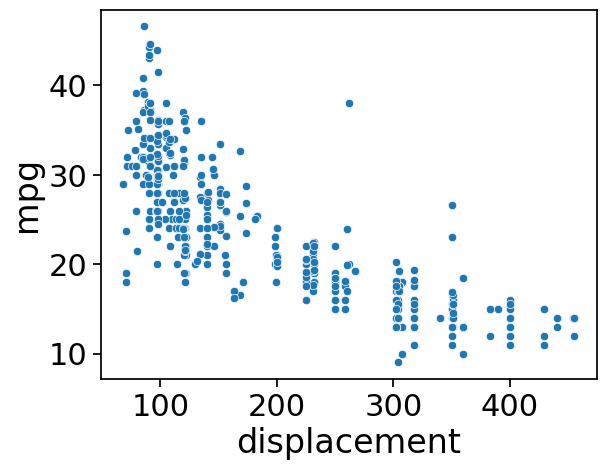

In [110]:
sns.scatterplot(x='displacement', y='mpg', data=df_dummy);

### **2. Normality (Normalitas Residual)**
- Residual diharapkan **berdistribusi normal**.
- Dapat dicek dengan **histogram residual**, **Q-Q plot**, atau **Shapiro-Wilk test**.

C:\Users\Haqi Dhiya\AppData\Local\Temp\ipykernel_24060\2245137511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid)


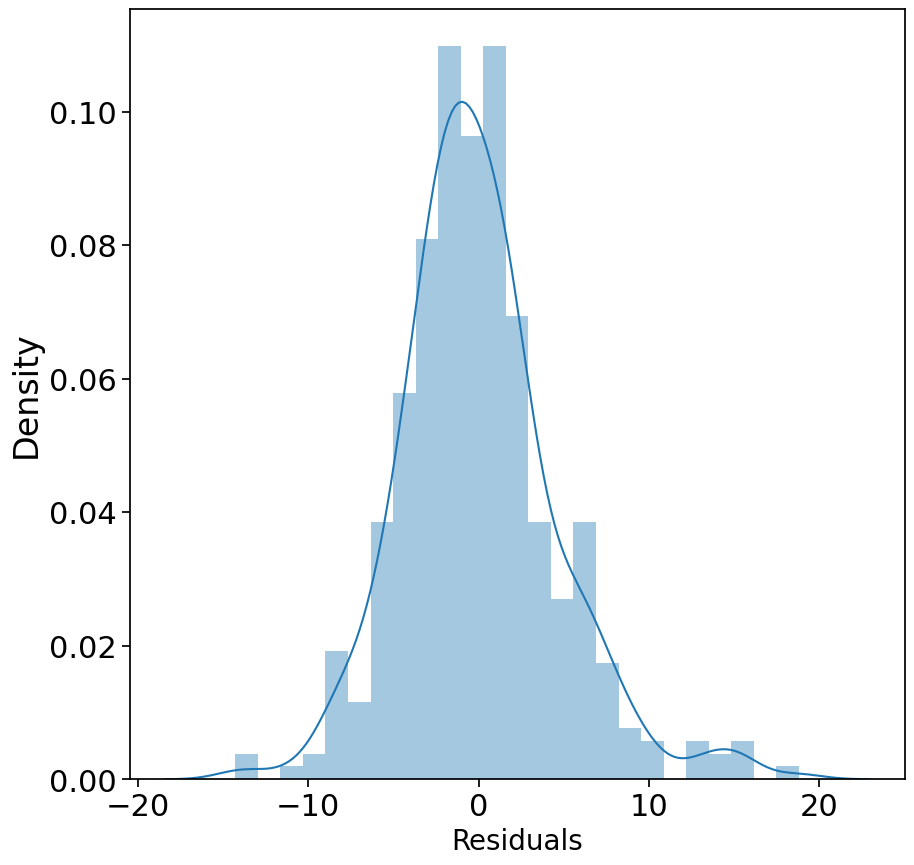

In [111]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20);

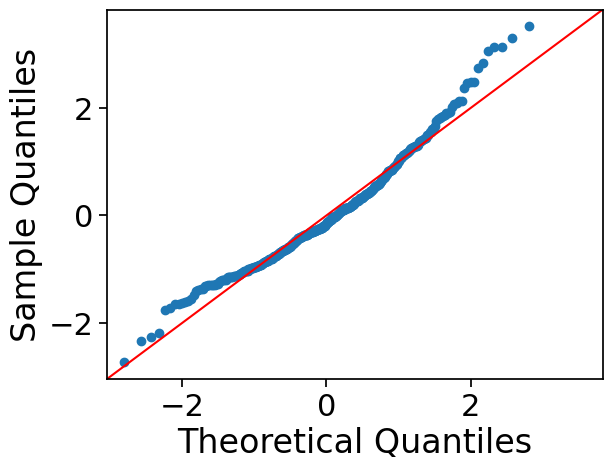

In [132]:
# Cek dengan menggunakan QQ plot
sm.qqplot(result.resid, line = '45', fit=True);

### **Interpretasi Normalitas Residual**

- Jika residual mengikuti **garis merah 45 derajat** pada Q-Q plot, maka residual dapat dianggap **mendekati distribusi normal**.  
- Tidak disarankan menggunakan **normality test** (misal Shapiro-Wilk) pada dataset besar, karena hasilnya cenderung selalu signifikan dan bisa **menyimpulkan residual tidak normal** meskipun secara praktis sudah normal.  
- Oleh karena itu, **visualisasi histogram atau Q-Q plot** lebih direkomendasikan untuk menilai normalitas residual pada dataset besar.

### **Cek Asumsi Gauss-Markov**

Asumsi Gauss-Markov memastikan bahwa estimator OLS adalah **Best Linear Unbiased Estimator (BLUE)**. Yang diperiksa adalah **error/residual** dengan asumsi:  

- Rata-rata error pada populasi adalah nol.  
- Error tidak berkorelasi dengan error lainnya (independensi).  
- Error memiliki ragam yang homogen (homoscedasticity). 

![](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)

Gambar di atas menunjukkan berbagai pola residual dan hubungannya dengan **bias dan homoscedasticity**:

- **(a) Unbiased and Homoscedastic**  
  Residual tersebar acak di sekitar garis nol, ragam konstan → asumsi Gauss-Markov terpenuhi, model BLUE.

- **(b) Biased and Homoscedastic**  
  Residual memiliki pola naik/turun (tidak rata-rata nol), ragam konstan → bias, tapi variansi tetap homogen.

- **(c) Biased and Homoscedastic**  
  Pola residual melengkung, menunjukkan **non-linearity**, rata-rata residual tidak nol, variansi homogen.

- **(d) Unbiased and Heteroscedastic**  
  Residual rata-rata nol tapi menyebar tidak merata → homoscedasticity dilanggar.

- **(e) Biased and Heteroscedastic**  
  Residual rata-rata tidak nol dan menyebar tidak merata → bias + heteroscedasticity.

- **(f) Biased and Heteroscedastic**  
  Residual memiliki pola kompleks, rata-rata tidak nol dan variansi berubah-ubah → pelanggaran serius asumsi Gauss-Markov.

**Kesimpulan:**
- Idealnya residual harus seperti **(a)** → tidak bias dan homoscedastic.  
- Pola lain menunjukkan pelanggaran asumsi, yang dapat memengaruhi **koefisien dan prediksi model**.

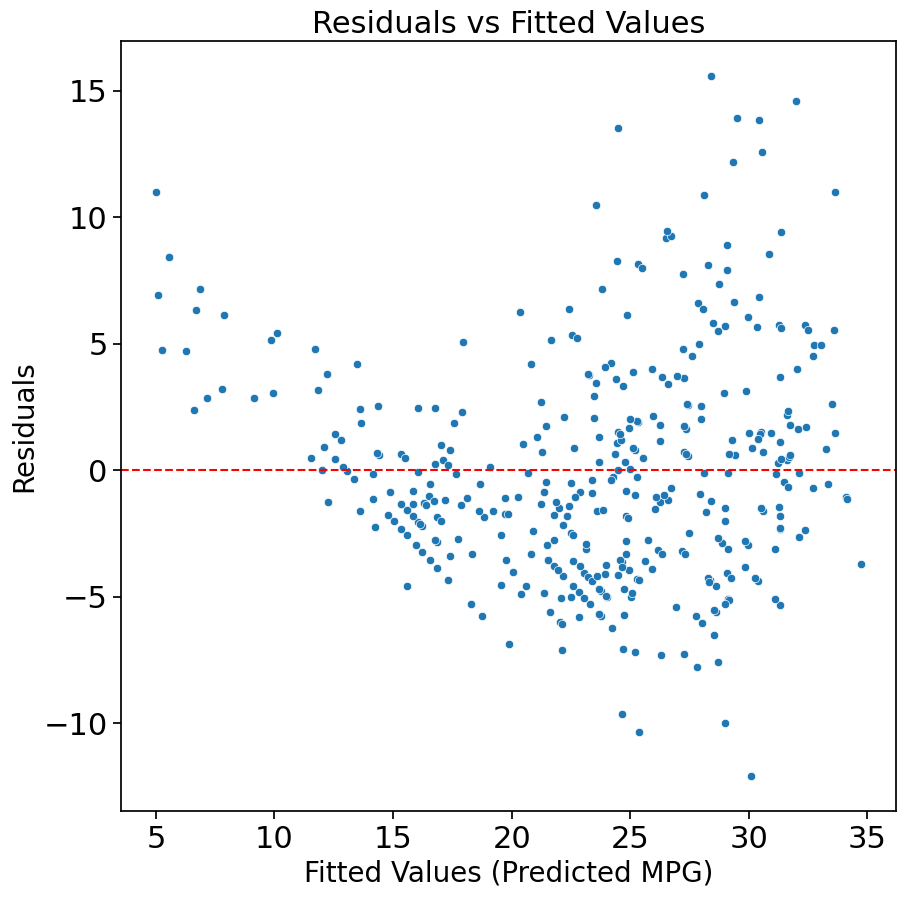

In [134]:
plt.figure(figsize=(10, 10))
sns.set_context('notebook', font_scale=2)

# Scatter plot residuals vs fitted values
sns.scatterplot(x=result.fittedvalues, y=result.resid)

# Garis horizontal di 0
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('Fitted Values (Predicted MPG)', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title("Residuals vs Fitted Values", fontsize=22)
plt.show()


### **Interpretasi**

1. Dari **histogram residual** dan **Q-Q plot**, terlihat bahwa residual relatif simetris dan sebagian besar mengikuti distribusi normal, meskipun terdapat penyimpangan di bagian ekor (outlier) serta kurtosis yang agak tinggi. Ini berarti, asumsi **normalitas residual sebagian besar terpenuhi**, walaupun tidak sempurna.  
2. Dari **plot residual vs fitted**, terlihat adanya pola lengkung dan penyebaran residual yang tidak konstan (heteroskedastisitas). Hal ini menunjukkan bahwa asumsi **homoskedastisitas** tidak sepenuhnya terpenuhi.  
3. Meskipun residual rata-rata tersebar di sekitar 0 (tidak terjadi pelanggaran berat asumsi unbiasedness), pola yang muncul menunjukkan bahwa hubungan antara variabel prediktor dan `mpg` tidak sepenuhnya linear.  

Dengan kata lain, walaupun multikolinearitas tidak menjadi masalah (VIF terpenuhi) dan nilai Adjusted R² cukup tinggi, model regresi linear ini memiliki keterbatasan. Beberapa asumsi penting (linearitas dan homoskedastisitas) tidak sepenuhnya terpenuhi, sehingga **hasil prediksi cenderung bias dan kurang reliabel**.  
